# Acquire Data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import explore
from env import host, username, password
import acquire

In [4]:
# Get connection url using get_connection function from acquire
url = acquire.get_connection('telco_churn')

In [5]:
# Acquire Telco data from Codeup SQL database using acquire.telco_data function
telco_df = acquire.telco_data()

In [6]:
# Rough telco_df import
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


***
Observations:
* Drop Columns (redundant): ['customer_id']
* Binary Conversions: ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']
    * gender will have to be converted to is_male 
* Reference Data to leave in original df but leave out of Train data (note: numeric data in separate column): ['contract_type', 'internet_service_type', 'payment_type']    
* Assumptive manipulation --> following columns contain data (No Internet & No phone service) that may be valuable to explore how this extra feature subset impacts behavior of separate feature but for purposes of initial review I will convert to binary: ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
***

In [7]:
# DF info summary stats
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

***
### info() summary:
* 6 numerical & 17 categorical dtypes
* 0 "missing" and 0 'null' values 
* numerics- 1 float and 5 int dtypes

NOTE: total_charges in str format (need to convert to continuous numeric)
***

In [8]:
# Describe (assumption: all numerical/continues data included)
telco_df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


***
### describe() summary:
* Continuous values: ['tenure', 'monthly_charges']
* Categorical numerical values: ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen']
***    

([], [])

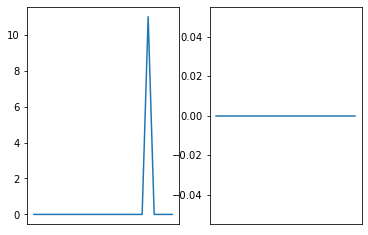

In [9]:
# investigate the telco_df data further to see if any categorical dtypes contain, na, empty or blank values
# Visualize the 'na' and ' ' first
plt.subplot(1, 2, 1)
plt.plot((telco_df==' ').sum())
plt.xticks([])

plt.subplot(1, 2, 2)
plt.plot((telco_df=='na').sum())
plt.xticks([])

In [10]:
# Visualizations show 0 categorical dtype contain 'na' and one contains  ' '.
# Use a sum of booleans to identify which feature contains ' ' and how many
print((telco_df == ' ').sum())

payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64


***
NOTE: Will have to decide during Data Preparation how to address the 11 empty string values for total_charges 
***

In [11]:
# List quant_vars & cat_vars
quant_vars = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen']
cat_vars = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn', 'contract_type', 'internet_service_type', 'payment_type']

# Data Preparation

In [12]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

#### Prep data on observations made during Acquire stage

In [13]:
# Drop redundant column and begin prepping data set
prep_df = telco_df.drop(columns=['customer_id'])

In [14]:
# After running into an issue below, I decided to convert the total_charges spaces to a zero at this point. 
prep_df['total_charges'] = prep_df['total_charges'].replace(' ', 0)

#Also ran a value counts to make sure I now have 11 zeros instead of empty values.
prep_df['total_charges'].value_counts()

0          11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
860.85      1
1533.8      1
168.6       1
3734.25     1
4245.55     1
Name: total_charges, Length: 6531, dtype: int64

In [15]:
# Convert total_charges from a str to a float
prep_df['total_charges'] = prep_df['total_charges'].astype(float)

NOTE: Received an error here initially and after investigation, the empty entries created the issue  After revewing the data, the empty values are direclty associated with new contracts, so to address this issue, I decided to enter an amount of 0 for these entries as it appears they have not gone through a bililng cycle and therefore have no cumulative charges to show. Addressed this in previous cell.

In [16]:
# Drop columns with reference data
prep_df = prep_df.drop(columns=['contract_type', 'internet_service_type', 'payment_type'])

In [17]:
# Control check on the dtypes of my prep_df at this point
prep_df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges               float64
churn                        object
dtype: object

In [18]:
# Now that I'm ready to convert Yes/No to 1/0 across entire df, taking a value_counts snapshot of my prep_df at this point as a control for later potential reference
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
No     3641
Yes    3402
Name: partner, dtype: int64
**********************
No     4933
Yes    2110
Name: dependents, dtype: int64
**********************
Yes    6361
No

In [19]:
# Replace Yes/No entries with 1/0 across entire df
prep_df = prep_df.replace({'Yes':1, 'No':0})

In [20]:
# Check to make sure replace was successful.  NOTE: language containing No was not replaced, need to address in next step
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Na

In [21]:
# Assumptive Manipulation: conversion of non-service to a 'No'
prep_df = prep_df.replace({'No internet service':0, 'No phone service':0})

# check update via value counts
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Na

In [22]:
# Final data prep steps: 
# convert the gender column to is_male and male/female strings to 1/0 values
prep_df = prep_df.rename(columns={'gender': 'is_male'})

# replace male/female with 1/0
prep_df = prep_df.replace({'Male':1, 'Female':0})

# Check
prep_df.head(100)

,payment_type_id,internet_service_type_id,contract_type_id,is_male,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,2,1,3,0,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.90,0
1,4,1,3,1,0,0,0,54,0,0,1,0,0,1,1,0,0,45.20,2460.55,0
2,3,1,3,0,0,0,0,56,0,0,1,1,1,1,0,0,0,45.05,2560.10,0
3,4,1,3,1,0,1,1,20,0,0,1,0,1,1,0,0,1,39.40,825.40,0
4,3,1,3,1,0,1,0,72,1,1,0,1,1,1,1,1,1,85.15,6316.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,3,1,0,0,0,60,1,0,1,1,1,0,0,0,0,61.40,3638.25,0
96,3,1,3,1,0,1,1,45,1,0,1,0,0,1,0,0,0,54.65,2553.70,0
97,4,1,3,1,0,1,1,72,1,1,1,1,1,1,1,1,0,89.85,6562.90,0
98,2,1,3,1,0,1,1,72,0,0,1,0,1,1,1,0,0,48.90,3527.00,0


In [23]:
# final control check
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'is_male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
1    3555
0    3488
Name: is_male, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Name: phone

***
##### Now that final control is passed, create function to iterate Data Preparation steps
***

'''
def prep_df(df):
    
    # Drop redundant data column 
    prep_df = telco_df.drop(columns=['customer_id'])
    
    # convert the total_charges spaces to zeros  
    prep_df['total_charges'] = prep_df['total_charges'].replace(' ',0)
    
    # Convert total_charges from a str to a float
    prep_df['total_charges'] = prep_df['total_charges'].astype(float)
    
    # Drop columns with reference data
    prep_df = prep_df.drop(columns=['contract_type', 
    'internet_service_type', 'payment_type'])
    
    # Replace Yes/No entries with 1/0 across entire df
    prep_df = prep_df.replace({'Yes':1, 'No':0})
    
    # Assumptive Manipulation: conversion of non-service to a 0 
    prep_df = prep_df.replace({'No internet service':0, 'No phone service':0})
    
    # convert the gender column to is_male and male/female strings to 1/0 values
    prep_df = prep_df.rename(columns={'gender': 'is_male'})

    # replace male/female with 1/0
    prep_df = prep_df.replace({'Male':1, 'Female':0})
    
    return prep_df 
'''

***
#### Split the Data: Train, Validate & Test
***

In [24]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own modules
import acquire
import prepare

In [25]:
# Run function to take in prep_data from Telco and split   
train, validate, test = prepare.telco_split(prep_df)

In [26]:
# validate the split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


# Data Exploration

In [27]:
import seaborn as sns

In [28]:
# Create a list of train columns as reference, removing target ('churn')
columns = train.columns.tolist()
columns.remove('churn')
columns

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'is_male',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges']

In [40]:
# Group data into two sets as per continous vs categorical dtypes 
cont_data = ['tenure', 'monthly_charges', 'total_charges']
bin_data = [x for x in columns if x not in cont_data]
disc_data = [x for x in columns if x not in cont_data]


['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'is_male',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing']

In [30]:
def normal(x):
    for col in columns:
        print(prep_df[col].value_counts(normalize=True))
        print('**********************')

#### Visualize Continous Data

Text(0.5, 0, 'Tenure')

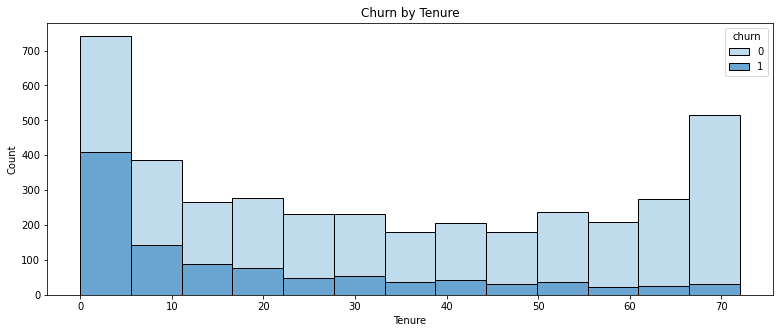

In [31]:
# Churn by Tenure 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Tenure")
plt.xlabel('Tenure')



Text(0.5, 0, 'monthly_charges')

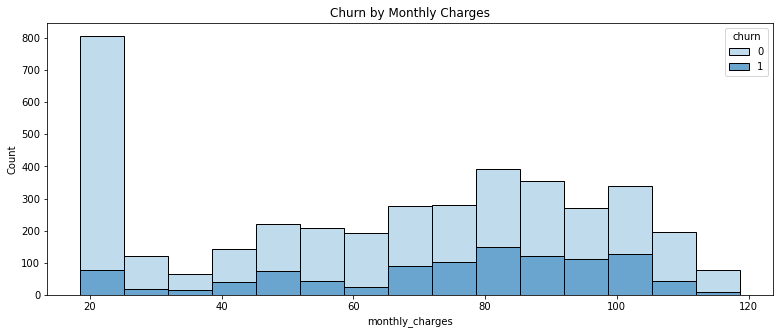

In [32]:
# Churn by Monthly Charges 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.monthly_charges,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Monthly Charges")
plt.xlabel('monthly_charges')


Text(0.5, 0, 'total_charges')

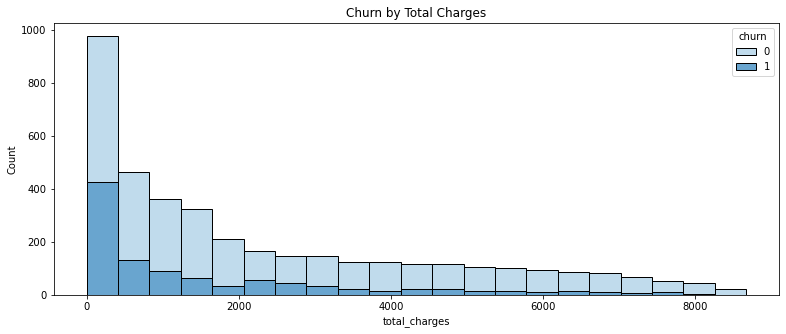

In [33]:
# Churn by Total Charges 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.total_charges,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Total Charges")
plt.xlabel('total_charges')

#### Visualize Discrete Data

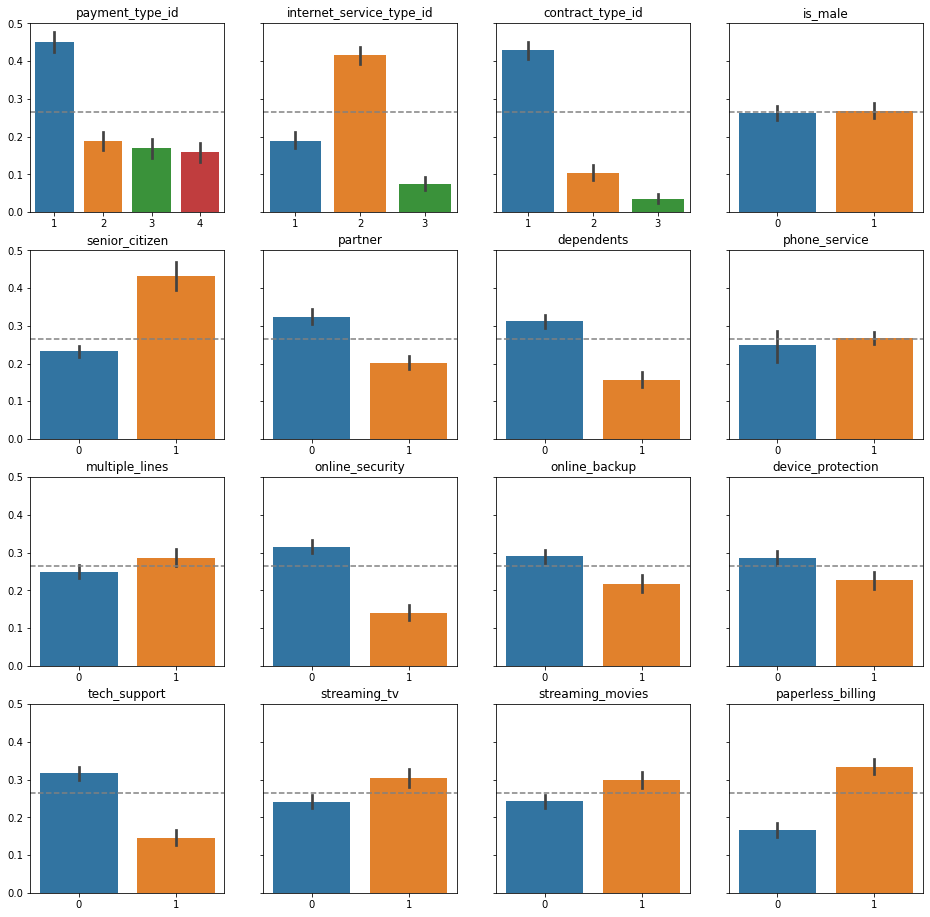

In [57]:
churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
for i, col in enumerate(disc_data):
    ax = ax.flatten()
    sns.barplot(col, train.churn, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col)
    ax[i].axhline(churn_rate, ls='--', color='grey')

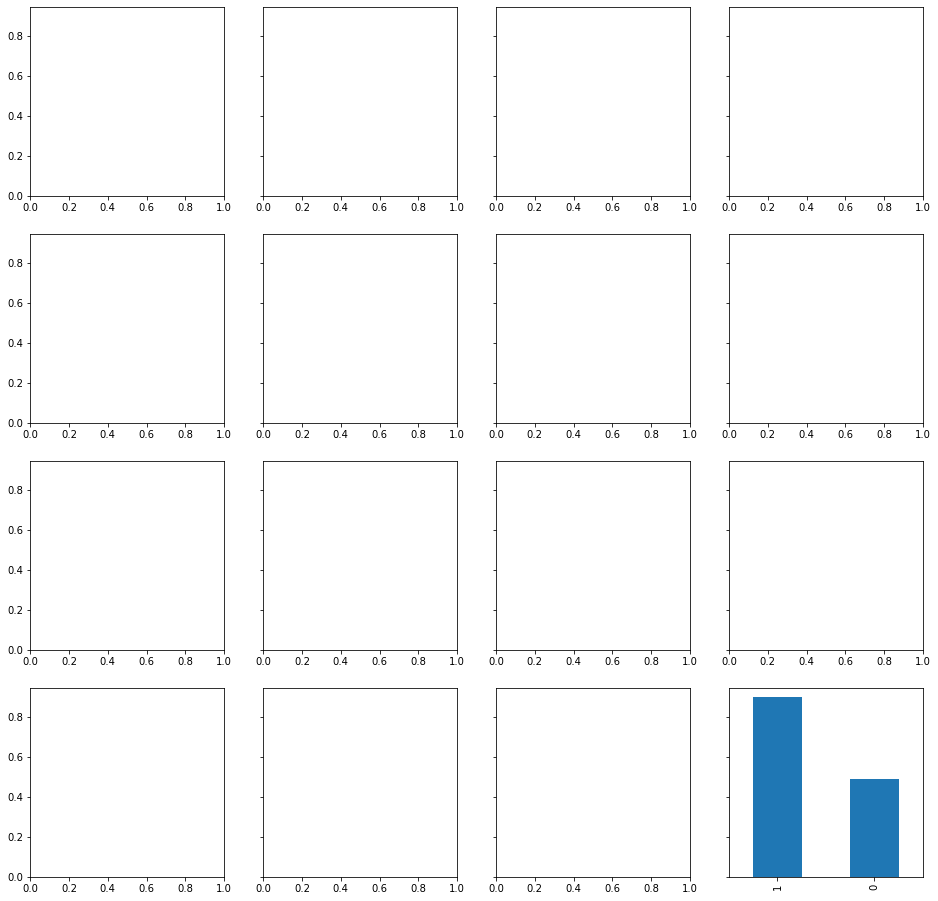

In [129]:
_, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
for i, col in enumerate(disc_data):
    train[col].value_counts(normalize=True).plot(kind='bar')


In [ ]:
x = train[['churn', 'internet_service_type_id']]
x1 = x.value_counts(normalize=True)
sns.barplot(x1, x='internet_service_type_id', hue='churn', multiple='stack')

In [ ]:
sns.barplot(data=train, x_vars=train.churn, y_vars=train.internet_service_type_id)

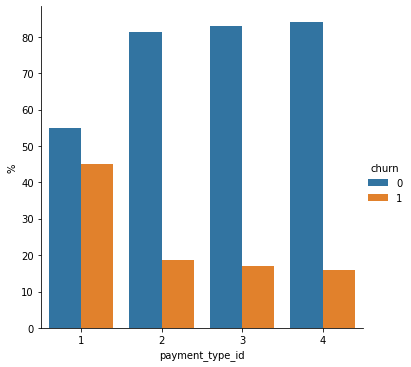

In [167]:
x,y = 'payment_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar'))

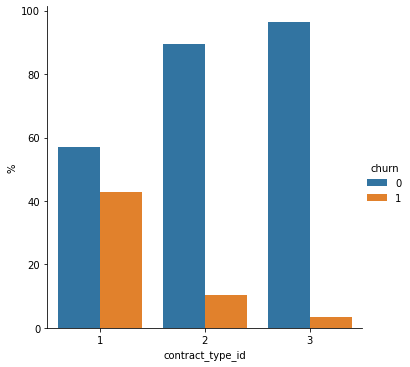

In [169]:
x,y = 'contract_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar'))

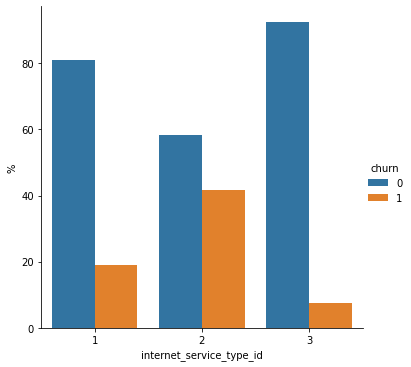

In [172]:
x,y = 'internet_service_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar'))

In [ ]:
# Explore relationship b/w each feature and target

churn_rate = train.churn.mean()
for i, col in enumerate(train.columns[:-1]):

    plt.figure(i)
    sns.barplot(data=train, x=col, y=train.churn)

In [ ]:
churn_rate = train.churn.mean()
for i, col in enumerate(train.columns[:-1]):
    plt.subplots(nrows=5, ncols=4, figsize=(16, 6)
    sns.barplot(ax=aI, data=train, x=col, y=train.churn)

In [ ]:


churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=5, ncols=4, figsize=(16, 6), sharey=True)
for i, col in enumerate(columns):
    sns.barplot(x=col, y='churn', ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col)
    ax[i].axhline(churn_rate, ls='--', color='grey')


In [ ]:
plt.subplots(nrows=5, ncols=4, figsize=(16, 6))
columns = train.columns[:-1]

In [ ]:
sns.barplot(x=columns, y=train.churn, ax=ax[i], alpha=0.5)
   

KeyError: 'churn'

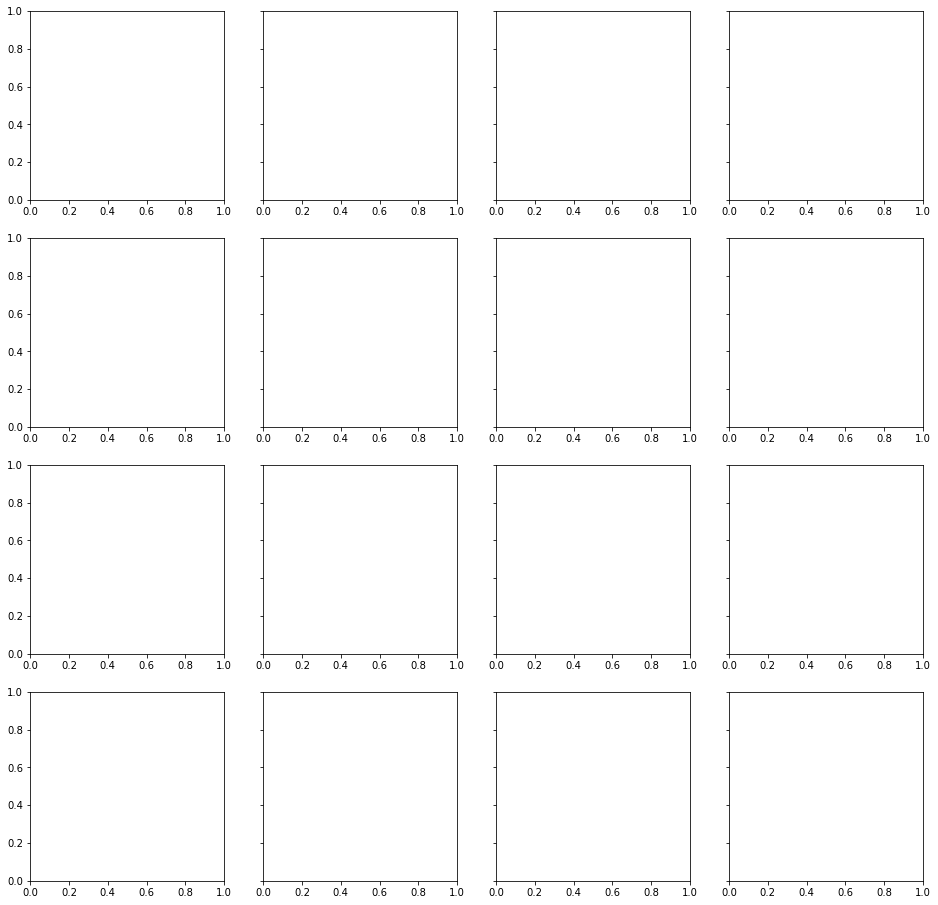

In [64]:
df=train.groupby(['churn'])[['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',]].agg('mean')

churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
for i, col in enumerate(df):
    ax = ax.flatten()
    sns.barplot(col, df['churn'], data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col)
    ax[i].axhline(churn_rate, ls='--', color='grey')

<AxesSubplot:>

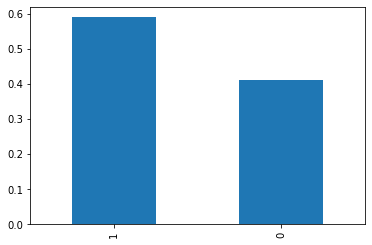

In [109]:
train['paperless_billing'].value_counts(normalize=True).plot(kind='bar')